#CS 412 - Homework 2



## **Submission:**
Once you have completed this notebook, Download it as .ipynb and name it Name-Surname-CS412-HW2.ipynb. Submit the ipynb to SuCourse.


## Task 1: Exploring the CIFAR-10 Dataset

The CIFAR-10 dataset has been preloaded for you. Your first task is to explore the dataset and extract the following information:

1. **Number of training examples**: How many examples are in the training set?
2. **Number of testing examples**: How many examples are in the testing set?
3. **Each image is of size**: What are the dimensions of each image in the dataset?
4. **Shapes of the datasets**:
   - `train_x`: The shape of the training images.
   - `train_y`: The shape of the training labels.
   - `test_x`: The shape of the testing images.
   - `test_y`: The shape of the testing labels.

Additionally, display one example image from the training set along with its label to verify the data integrity.

Complete the missing parts of the code below to answer these questions.


In [ ]:
!pip install torchviz

Files already downloaded and verified
Files already downloaded and verified


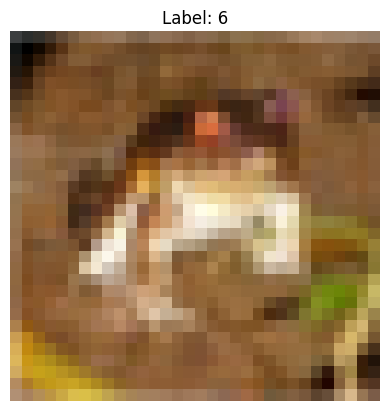

In [ ]:
# Step 1: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

# Step 2: Load CIFAR-10 dataset
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = datasets.CIFAR10(root="./data", train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root="./data", train=False, download=True, transform=transform)

# Step 3: Visualize an example image
def visualize_example(dataset):
    img, label = dataset[0]
    img = img.permute(1, 2, 0).numpy()  # Rearrange dimensions for visualization
    plt.imshow(img)
    plt.title(f"Label: {label}")
    plt.axis("off")
    plt.show()

visualize_example(train_dataset)

In [ ]:
# --- Student's Task Below ---
# Students should compute:
# Number of training examples
# Number of testing examples
# Image size
# Shapes of train_x_orig, train_y, test_x_orig, and test_y
# Last Step: Print the results

## Task 2: Building Neural Network Architectures

In this task, your goal is to build two neural networks for the CIFAR-10 classification problem. Follow the structure provided below and implement the networks from scratch using PyTorch.

### **Neural Network 1: Fully Connected Network**
Implement a fully connected neural network for CIFAR-10 classification:
1. Input size: 3072 (flattened \(32 \* 32 \* 3\) image).
2. Hidden layer: Linear layer with 128 neurons and ReLU activation.
3. Output layer: Linear layer with 10 neurons and Softmax activation.
4. Architecture: `LINEAR -> RELU -> LINEAR -> SOFTMAX`.

### **Neural Network 2: Convolutional Neural Network**
Implement a convolutional neural network for CIFAR-10 classification:
1. Input size: \(32 \* 32 \* 3\) (raw image).
2. Hidden layers:
   - Convolutional layer with 32 filters (\(3 \* 3\)), ReLU activation, and max pooling (\(2 \* 2\)).
   - Convolutional layer with 64 filters (\(3 \* 3\)), ReLU activation, and max pooling (\(2 \* 2\)).
3. Fully connected layers:
   - Flatten the output from the convolutional layers.
   - Linear layer with 128 neurons and ReLU activation.
   - Linear layer with 10 neurons and Softmax activation.
4. Architecture: `CONV -> RELU -> POOL -> CONV -> RELU -> POOL -> FLATTEN -> LINEAR -> RELU -> LINEAR -> SOFTMAX`.

Complete the code below to implement these two neural networks.


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

# Task 2.1: Fully Connected Neural Network
# Fill in the missing parts for the fully connected network
class FullyConnectedNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(FullyConnectedNN, self).__init__()
        # Define the layers
        self.fc1 = ...  # Input to hidden layer
        self.fc2 = ... # Hidden to output layer

    def forward(self, x):
        # Define the forward pass
        x = ...  # Flatten the input
        x = F.relu(...)  # Apply ReLU activation
        x = F.softmax(...)  # Apply Softmax activation
        return x

# Task 2.2: Convolutional Neural Network
# Fill in the missing parts for the CNN
class ConvolutionalNN(nn.Module):
    def __init__(self):
        super(ConvolutionalNN, self).__init__()
        # Define the layers
        ...

    def forward(self, x):
        # Define the forward pass
        x = ... # Conv1 -> ReLU -> Pool
        x = ...
        x = ...
        x = ...
        x = ...
        return x

Visualizing Fully Connected Neural Network...


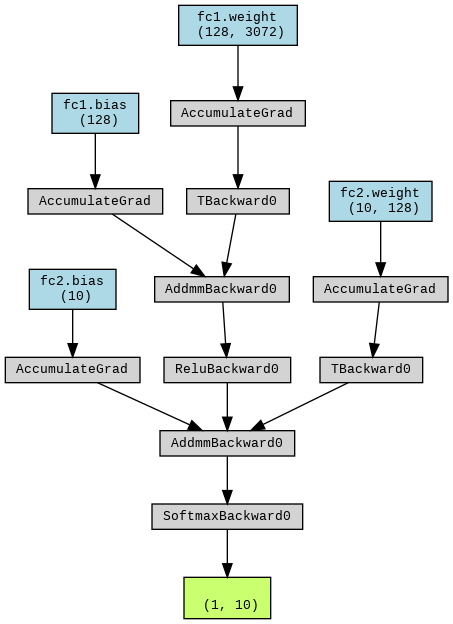

In [ ]:
from torchviz import make_dot
import torch
from IPython.display import Image, display

# Function to visualize and display a neural network in Colab
def visualize_model(model, input_size):
    # Create dummy input to pass through the model
    dummy_input = torch.randn(*input_size)
    output = model(dummy_input)
    # Generate the graph using torchviz
    graph = make_dot(output, params=dict(model.named_parameters()))
    # Render the graph to a PNG image in memory
    graph.render("temp_graph", format="png", cleanup=True)
    # Display the image in Colab
    display(Image("temp_graph.png"))

# Visualize Fully Connected Neural Network
print("Visualizing Fully Connected Neural Network...")
fc_input_size = (1, 3072)  # Example input size for a fully connected network
model_fc = FullyConnectedNN(input_size=3072, hidden_size=128, output_size=10)
visualize_model(model_fc, fc_input_size)


Visualizing Convolutional Neural Network...


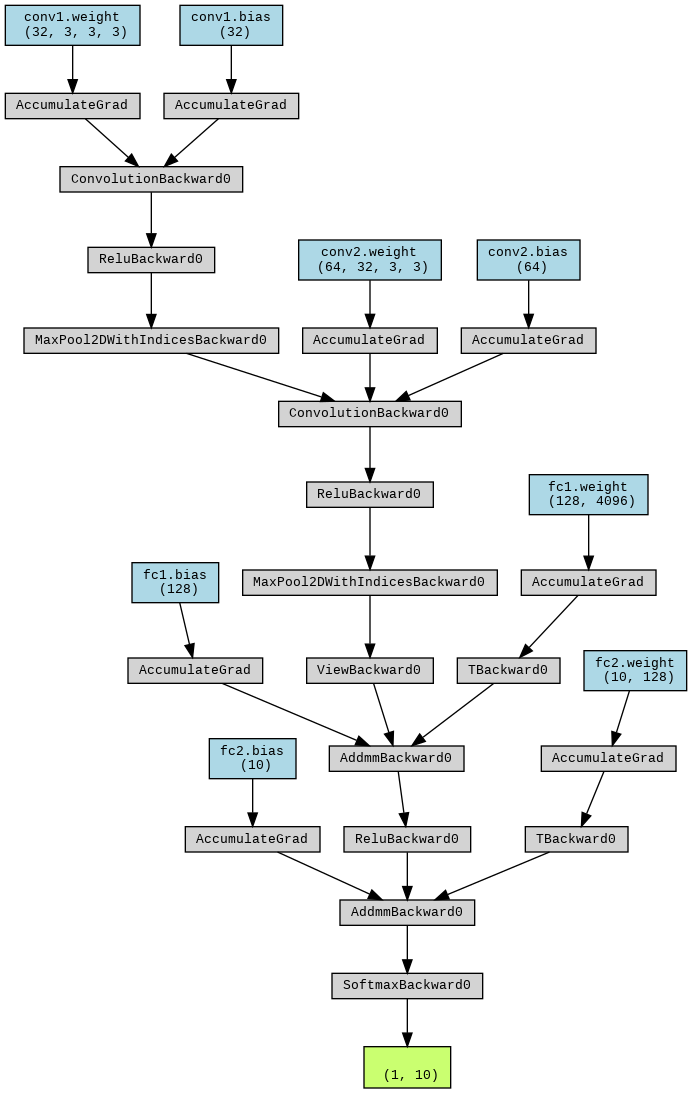

In [ ]:
# Visualize Convolutional Neural Network
print("\nVisualizing Convolutional Neural Network...")
cnn_input_size = (1, 3, 32, 32)  # Example input size for a convolutional network
model_cnn = ConvolutionalNN()
visualize_model(model_cnn, cnn_input_size)

## Task 3: Training and Comparing Neural Network Models

In this task, you will train and evaluate both neural network models (Fully Connected Network and Convolutional Neural Network) that you implemented in Task 2.

### Steps:
1. Use the CIFAR-10 dataset prepared in Task 1
2. Train both models using the following setup:
   - Optimizer: SGD (Stochastic Gradient Descent) with a learning rate of 0.01.
   - Loss function: CrossEntropyLoss.
   - Number of epochs: 5.
   - Batch size: 64.
3. After training each model, evaluate its accuracy on the test set.
4. Compare the performance of both models:
   - Which model achieves higher accuracy?
   - Discuss the reasons for the difference in performance.

### Deliverables:
- Training and testing accuracy for each model.
- A plot of training loss vs. epochs for both models.
- A short discussion comparing the results of the two models.


In [ ]:
import torch
from torch.utils.data import DataLoader
import torch.optim as optim
from sklearn.metrics import accuracy_score, f1_score

# Define training function
def train_model(model, train_loader, test_loader, num_epochs=5, learning_rate=0.01):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)
    optimizer = ...
    criterion = ... #loss function

    for epoch in range(num_epochs):
        model.train()
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = ...
            loss = ...

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item():.4f}")

# Define evaluation function
def evaluate_model(model, test_loader):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    accuracy = accuracy_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds, average="weighted")
    return accuracy, f1

# Prepare DataLoaders
train_loader = DataLoader(train_dataset, ... , shuffle=True)
test_loader = DataLoader(test_dataset, ... , shuffle=False)

# Train and evaluate Fully Connected Neural Network
print("Training Fully Connected Neural Network...")
...
print(f"Fully Connected NN - Accuracy: {fc_accuracy:.4f}, F1 Score: {fc_f1:.4f}")

# Train and evaluate Convolutional Neural Network
print("\nTraining Convolutional Neural Network...")
...
print(f"Convolutional NN - Accuracy: {cnn_accuracy:.4f}, F1 Score: {cnn_f1:.4f}")

# Plot
...


##Result


Comparison of the models here: